In [1]:
import math
import matplotlib.pyplot as plt

# Cálculo de reacciones
De los valores obtenidos por Octave:

pkg load symbolic
syms n
syms x
syms R1
syms R2
solve(R1+R2-(12-n)*70-(5000+10*n)-(50)*(30) == 0,R1)
solve(R1+R2-(12-n)*70-(5000+10*n)-(50)*(30) == 0,R2)
triang(x) = ((5/6)*x)*(200+2*n+x)
momt = int(triang(x),x,0,60)
%Valor de R2 depende únicamente de n -> se puede hallar R1
solve(R2*(310+2*n)-(12-n)*70*45-(130+2*n)*(5000+10*n)-(60000+200*n)-momt == 0,R2)

Llegamos a las siguientes dos ecuaciones:
$$
R_{2} = \frac{5\cdot(2n^{2} + 1135\,n + 110780)}{n+155}
$$
$$
R_{1} = 7340 - 60\,n - R_{2}
$$

In [22]:
n = 23

In [23]:
R2 = 5*(2*n*n + 1135*n + 110780)/(n+155)
R1 = 7340-60*n-R2
print(R1,R2)

2085.196629213483 3874.803370786517


# Fuerza cortante

Usando las funciones de Macaulay obtenemos la forma reducida de la expresión del cortante:

$$
V = R_{1} <x>^{0} - (12-n)<x-10>^{1} + (12-n)<x-80>^{1} - (5000+10n)<x-(130+2n)>^{0} + (60000+200n)<x-(130+2n)>^{-1} - \frac{5/6}{2}<x-(200+2n)>^{2} + 50<x-(260+2n)>^{1} + \frac{5/6}{2}<x-(260+2n)>^{2} + R_{2} <x-(310+2n)>^{0}
$$

Procedemos a hallar los valores de V para cada punto y observar la gráfica formada

In [24]:
v = []
v.append(0)
for x in range(1,310+2*n+1):
    aux = R1
    if x>10:
        aux = aux-(12-n)*(x-10)
    if x>130+2*n:
        aux = aux-(5000+10*n)
    if x>80:
        aux = aux + (12-n)*(x-80)
    if x>260+2*n:
        aux = aux+(50)*(x-(260+2*n)) + (5/12)*(x-(260+2*n))*(x-(260+2*n))
    if x>200+2*n:
        aux = aux-(5/12)*(x - (200+2*n))*(x - (200+2*n))
    if x>=310+2*n:
        aux = aux + R2
    v.append(aux)

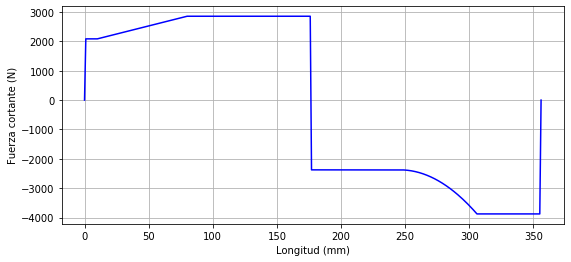

In [26]:
plt.figure(figsize=(9,4))
plt.xlabel('Longitud (mm)')
plt.ylabel('Fuerza cortante (N)')
plt.grid()
plt.plot(v,'-b')
plt.savefig('Fuerzacortante.pdf')
#plt.savefig('Fuerzacortante.png',dpi=300)

# Momento flector

$$
M = R_{1} <x>^{1} - \frac{12-n}{2}<x-10>^{2} + \frac{12-n}{2}<x-80>^{2} - (5000+10n)<x-(130+2n)>^{1} + (60000+200n)<x-(130+2n)>^{0} - \frac{5/6}{6}<x-(200+2n)>^{3} + \frac{50}{2}<x-(260+2n)>^{2} + \frac{5/6}{6}<x-(260+2n)>^{3} + R_{2}<x-(310+2n)>^{1}
$$

De la misma forma, hallamos los valores para el momento flector

In [27]:
m = []
for x in range(0,310+2*n+1):
    aux = R1*x
    if x>10:
        aux = aux-(12-n)*(x-10)*(x-10)/2
    if x>130+2*n:
        aux = aux-(5000+10*n)*(x-(130+2*n))
    if x>80:
        aux = aux + (12-n)*(x-80)*(x-80)/2
    if x>260+2*n:
        aux = aux+(25)*(x-(260+2*n))*(x-(260+2*n)) + (5/36)*(x-(260+2*n))*(x-(260+2*n))*(x-(260+2*n))
    if x > 130+2*n:
        aux = aux+(60000+200*n)
    if x>200+2*n:
        aux = aux-(5/36)*(x - (200+2*n))*(x - (200+2*n))*(x - (200+2*n))
    if x>=310+2*n:
        aux = aux + R2*(x-(310+2*n))
    m.append(aux)

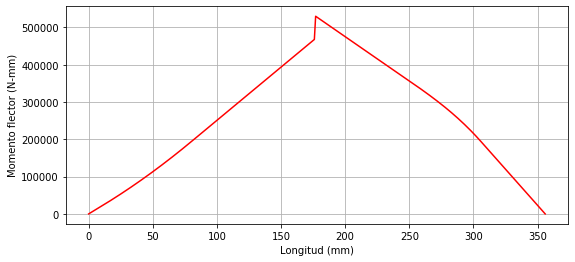

In [28]:
plt.figure(figsize=(9,4))
plt.grid()
plt.xlabel('Longitud (mm)')
plt.ylabel('Momento flector (N-mm)')
plt.plot(m,'r')
plt.savefig('momento.pdf')
#plt.savefig('momento.png',dpi=300)

$$
M = R_{1} <x>^{1} - \frac{12-n}{2}<x-10>^{2} + \frac{12-n}{2}<x-80>^{2} - (5000+10n)<x-(130+2n)>^{1} + (60000+200n)<x-(130+2n)>^{0} - \frac{5/6}{6}<x-(200+2n)>^{3} + \frac{50}{2}<x-(260+2n)>^{2} + \frac{5/6}{6}<x-(260+2n)>^{3} + R_{2}<x-(310+2n)>^{1}
$$

# Momento de inercia
Debido a que se trata de un eje de sección variable, el momento de inercia también lo es.

$$
D = \begin{cases}
40, & x<10 \\
50 , & 10 \leq x<80\\
50 + \frac{20(x-80)}{120+2n}, & 80 \leq x<200+2n\\
70, & 200+2n\leq x<260+2n\\
60, & 260+2n \leq x<300+2n\\
55, & 300+2n\leq x \leq 310\\
\end{cases}
$$

In [29]:
I = []
for i in range(0,310+2*n+1):
    if i<10:
        I.append((math.pi*(40)**4)/64)
        continue
    if i<80:
        I.append((math.pi*(50)**4)/64)
        continue
    if i<200+2*n:
        I.append((math.pi*(((50+((i-80)*20/(120+2*n))))**4)/64))
        continue
    if i<260+2*n:
        I.append((math.pi*(70)**4)/64)
        continue
    if i<300+2*n:
        I.append((math.pi*(60)**4)/64)
        continue
    I.append((math.pi*(55)**4)/64)

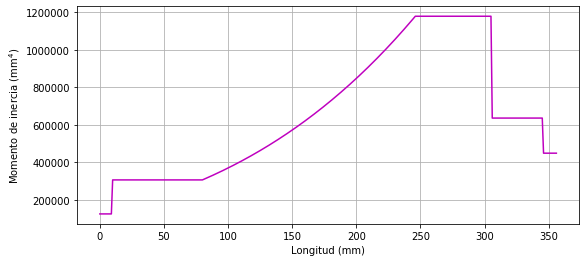

In [31]:
plt.figure(figsize=(9,4))
plt.grid()
plt.xlabel('Longitud (mm)')
plt.ylabel('Momento de inercia (mm$^4$)')
plt.plot(I,'-m')
plt.savefig('momentoi.pdf')
#plt.savefig('momentoi.png',dpi=300)

# Gráfico del M/EI

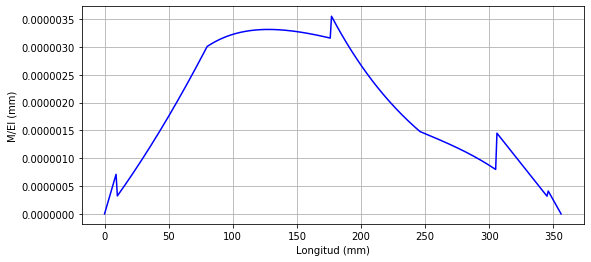

In [32]:
E = 2.1*10**5
MEI = []
for i in range(0,310+2*n+1):
    MEI.append(m[i]/(E*I[i]))
plt.figure(figsize=(9,4))
plt.grid()
plt.xlabel('Longitud (mm)')
plt.ylabel('M/EI (mm)')
plt.plot(MEI,'-b')
plt.savefig('mei.pdf')
#plt.savefig('mei.png',dpi=300)

# Cálculo de la deflexión

$$
M = R_{1} <x>^{1} - \frac{12-n}{2}<x-10>^{2} + \frac{12-n}{2}<x-80>^{2} - (5000+10n)<x-(130+2n)>^{1} + (60000+200n)<x-(130+2n)>^{0} - \frac{5/6}{6}<x-(200+2n)>^{3} + \frac{50}{2}<x-(260+2n)>^{2} + \frac{5/6}{6}<x-(260+2n)>^{3} + R_{2}<x-(310+2n)>^{1}
$$

Tenemos valores de M, entonces pasamos I dividiendo e integramos:
$$
\int M/I\,\mathrm{d}x = ??
$$

Sabemos sin embargo, que si la función $M/I$ es continua e integrable, entonces podemos hallar su integral definida:
$$
\int_{0}^{310+2n} M/I\,\mathrm{d}x = \left[ \int M/I\,\mathrm{d}x \right]_{310+2n} - 0
$$

Debido a que es complicado hallar la integral de $M/I$, optamos por hallar la integral definida para cada punto entre 0 y 310+2n de manera numérica, la cual es fácil de hallar. Recordando que los valores obtenidos corresponden a la de la integral $\int M/I \, \mathrm{d}x$

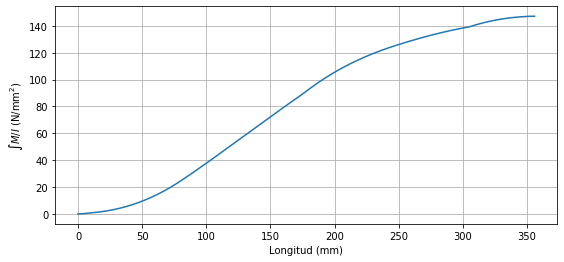

In [33]:
mi = []
mi.append(0)
for i in range(1,310+2*n+1):
    mi.append(m[i]/I[i] + mi[i-1])
plt.figure(figsize=(9,4))
plt.xlabel('Longitud (mm)')
plt.ylabel('$\int M/I$ (N/mm$^{2}$)')
plt.grid()
plt.plot(mi)
plt.savefig('mintegr.pdf')
#plt.savefig('mintegr.png',dpi=300)

La gráfica obtenida corresponde cuando la constante de integración es 0.

Volvemos a integrar para hallar la deflexión del eje, de la misma forma, debido a que tenemos los valores de la primera integral de forma numérica. La gráfica resultante debe corresponde a
$$
\left[\iint M/I \,\mathrm{d}x\right]_{310+2n} 
$$
Con constante de integración 0 para las dos integrales

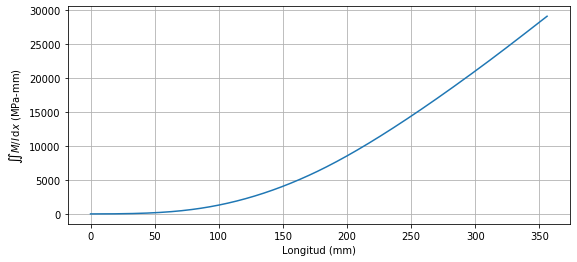

In [34]:
mii = []
mii.append(0)
for i in range(1,310+2*n+1):
    mii.append(mi[i]+mii[i-1])
plt.figure(figsize=(9,4))
plt.grid()
plt.xlabel('Longitud (mm)')
plt.ylabel('$ \iint M/I\,\mathrm{d}x $ (MPa-mm)')
plt.plot(mii)
plt.savefig('m2i.pdf')
#plt.savefig('m2i.png',dpi=300)

Para corregir el valor de las constantes de integración hallamos los valores que corresponden según las condiciones de frontera y dividimos entre E para hallar la deformada

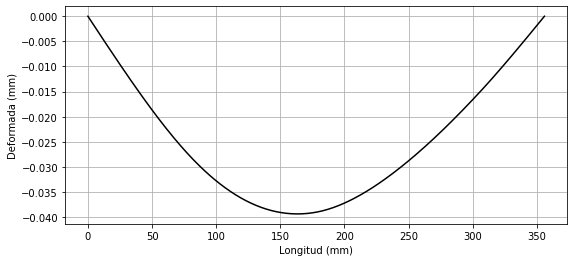

In [35]:
const = -mii[310+2*n]/(310+2*n)
for i in range(0,310+2*n+1):
    mii[i] = (mii[i]+const*i)/E
plt.figure(figsize=(9,4))
plt.grid()
plt.xlabel('Longitud (mm)')
plt.ylabel('Deformada (mm)')
plt.plot(mii,'-k')
plt.savefig('def.pdf')
#plt.savefig('def.png',dpi=300)

In [39]:
mii

[0.0,
 -0.00040857763351332635,
 -0.0008169827597587471,
 -0.0012251291251023093,
 -0.0016329304759100608,
 -0.0020403005585480478,
 -0.002447153119382318,
 -0.002853401904778919,
 -0.0032589606611038973,
 -0.0036637431347233008,
 -0.004068172313458034,
 -0.0044722127824519484,
 -0.004875828956113538,
 -0.005278985078115936,
 -0.005681645221396918,
 -0.006083773288158894,
 -0.006485333009868918,
 -0.006886287947258685,
 -0.007286601490324528,
 -0.00768623685832742,
 -0.008085157099792977,
 -0.008483325092511448,
 -0.008880703543537734,
 -0.009277254989191365,
 -0.009672941795056513,
 -0.010067726155981999,
 -0.010461570096081271,
 -0.010854435468732429,
 -0.011246283956578201,
 -0.01163707707152597,
 -0.012026776154747742,
 -0.01241534237668018,
 -0.012802736737024572,
 -0.013188920064746857,
 -0.01357385301807761,
 -0.013957496084512046,
 -0.014339809580810022,
 -0.014720753652996028,
 -0.015100288276359206,
 -0.015478373255453329,
 -0.01585496822409681,
 -0.01623003264537271,
 -0.016

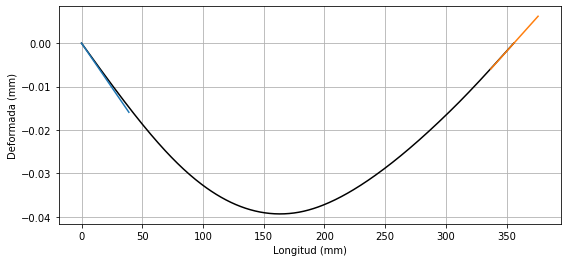

In [36]:
rect1 = []
rect2 = []
for i in range(0,40):
    rect1.append(-4.0824*10**(-4)*(i) - 2.4*10**-8)
    rect2.append(3.12*10**(-4)*(i+357-20) - 1.1110683*10**(-1))
indx = []
for i in range(357-20,357+20):
    indx.append(i)
plt.figure(figsize=(9,4))
plt.grid()
plt.xlabel('Longitud (mm)')
plt.ylabel('Deformada (mm)')
plt.plot(mii,'-k')
plt.plot(rect1)
plt.plot(indx,rect2)
plt.savefig('ang.pdf')

In [37]:
flechamax = 0
posflecha = 0
for i in range(0,310+2*n+1):
    flechamax = max(flechamax,abs(mii[i]))
for i in range(0,310+2*n+1):
    if(abs(mii[i]) == flechamax):
        posflecha = i

In [38]:
print(flechamax, posflecha)

0.03934076987376838 163


In [39]:
area = []
for i in range(0,310+2*n+1):
    if i<10:
        area.append(math.pi*(40/2))
        continue
    if i<80:
        area.append((math.pi*(50/2)))
        continue
    if i<200+2*n:
        area.append((math.pi*(((50+((i-80)*20/(120+2*n)))/2))))
        continue
    if i<260+2*n:
        area.append((math.pi*(70/2)))
        continue
    if i<300+2*n:
        area.append(math.pi*(60/2))
        continue
    area.append((math.pi*(55/2)))

# Mayor esfuerzo

In [42]:
esfm = 0
poses = 0
for i in range(0,310+2*n+1):
    if abs(math.sqrt(area[i]/math.pi)*m[i]/I[i]) > esfm:
        esfm = abs(math.sqrt(area[i]/math.pi)*m[i]/I[i])
        poses = i
print(esfm, poses)
#MPa

4.141837098031666 177


In [43]:
esfm = 0
poses = 0
gresf = []
for i in range(0,310+2*n+1):
    esff = abs(math.sqrt(area[i]/math.pi)*m[i]/I[i])
    gresf.append(math.sqrt(esff**2 + (v[i]/area[i])**2))
    if math.sqrt(esff**2 + (v[i]/area[i])**2) > esfm:
        esfm = math.sqrt(esff**2 + (v[i]/area[i])**2)
        poses = i
print(esfm, poses)

44.85276202599516 346


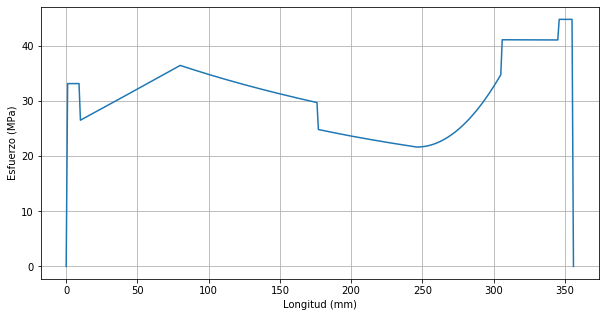

In [44]:
plt.figure(figsize=(10,5))
plt.grid()
plt.xlabel('Longitud (mm)')
plt.ylabel('Esfuerzo (MPa)')
plt.plot(gresf)
plt.savefig('esfuerzo.pdf')

# Anexos
Como paso previo se había procedido a hallar de forma analítica los valores de la deformada:

$$
\int M \, \mathrm{d}x = \frac{R_{1}}{2}x^{2} - \frac{12-n}{6} <x-10>^{3} + \frac{12-n}{6}<x-80>^{3} - \frac{5000+10n}{2}<x-(140+n)>^{2}+(60000+200n)<x-(140+n)>^{1} - \frac{5/6}{24}<x-(200+2n)>^{4}+\frac{50}{6}<x-(260+2n)>^{3}+\frac{5/6}{24}<x-(260+2n)>^{4} + \frac{R_{2}}{2}<x-(310+2n)>^{2} + C_{1}
$$

$$
EIv=\iint \!M \mathrm{d}x\mathrm{d}x = \frac{R_{1}}{6}x^{3} - \frac{12-n}{24} <x-10>^{4} + \frac{12-n}{24}<x-80>^{4} - \frac{5000+10n}{6}<x-(140+n)>^{3}+\frac{60000+200n}{2}<x-(140+n)>^{2} - \frac{5/6}{120}<x-(200+2n)>^{5}+\frac{50}{24}<x-(260+2n)>^{4}+\frac{5/6}{120}<x-(260+2n)>^{5} + \frac{R_{2}}{6}<x-(310+2n)>^{3} + C_{1}x + C_{2}
$$

La condición de frontera nos dice que para x=0 y para x=310+2n la deformación debe ser 0

$$
defl[310+2n] + C_{1}x + C_{2} = 0 \longrightarrow C_{1} = \frac{defl[310+2n]}{310+2n} \hspace{30pt} C_{2} = 0
$$

In [19]:
defl = []
for x in range(0,310+2*n+1):
    aux = R1*x*x*x/6
    if x>10:
        aux = aux-(12-n)*(x-10)*(x-10)*(x-10)*(x-10)/24
    if x>80:
        aux = aux + (12-n)*((x-80)**4)/24
    if x>140+n:
        aux = aux-(5000+10*n)*((x-(140+n))**3)/6
    if x > 140+n:
        aux = aux+(60000+200*n)*((x-(140+n))**2)/2
    if x>200+2*n:
        aux = aux-(5/6)*((x - (200+2*n))**5)/120
    if x>260+2*n:
        aux = aux+(50)*((x-(260+2*n))**4)/24 + (5/6)*((x-(260+2*n))**5)/120
    if x>=310+2*n:
        aux = aux + R2*((x-(310+2*n))**3)/6
    defl.append(aux)
C1 = -defl[310+2*n]/(310+2*n)
C2 = 0
for x in range(0,310+2*n+1):
    defl[x] = (defl[x] + C1*x + C2)/(E)

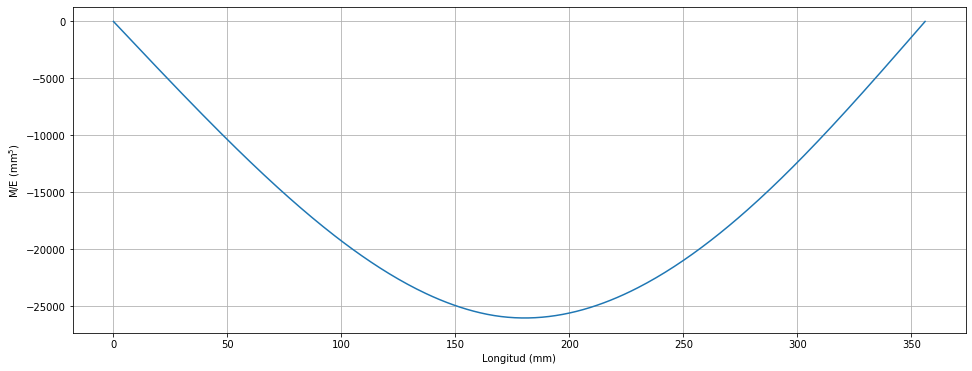

In [20]:
plt.figure(figsize=(16,6))
plt.grid()
plt.xlabel('Longitud (mm)')
plt.ylabel('M/E (mm$^5$)')
plt.plot(defl)

Dicho gráfico de deformada sería semejante al real si el momento de inercia fuera constante, el cual no es el caso. Para hallar una aproximación se dividió a los valores hallados con el momento de inercia para cada punto.

In [21]:
for x in range(0,310+2*n+1):
    defl[x] = (defl[x])/I[x] 

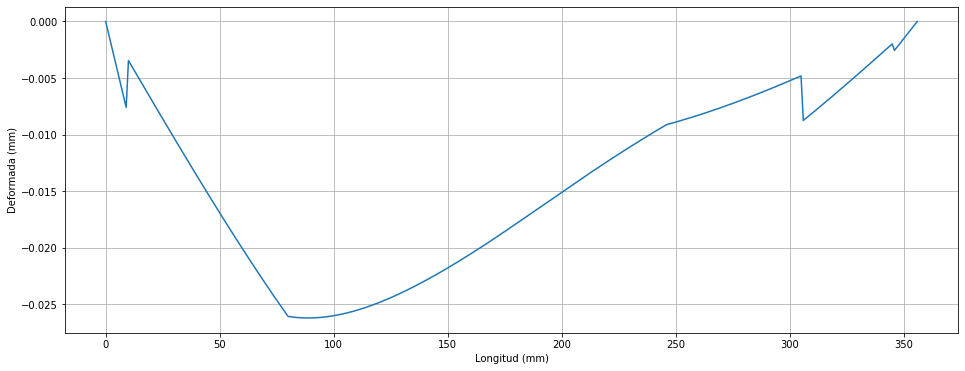

In [22]:
plt.figure(figsize=(16,6))
plt.grid()
plt.xlabel('Longitud (mm)')
plt.ylabel('Deformada (mm)')
plt.plot(defl)

# ANEXO

/home/heneos/anaconda3/envs/HeNeosCPU/lib/python3.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


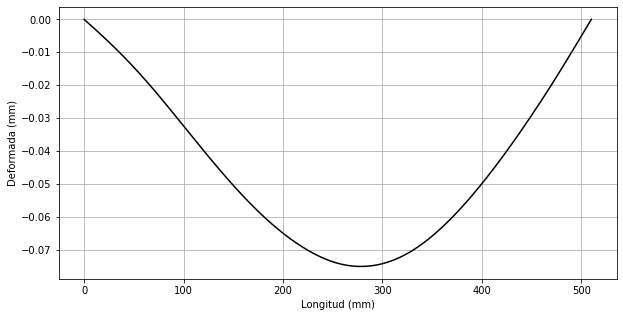

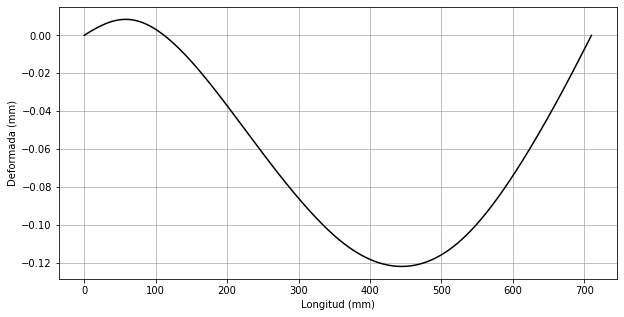

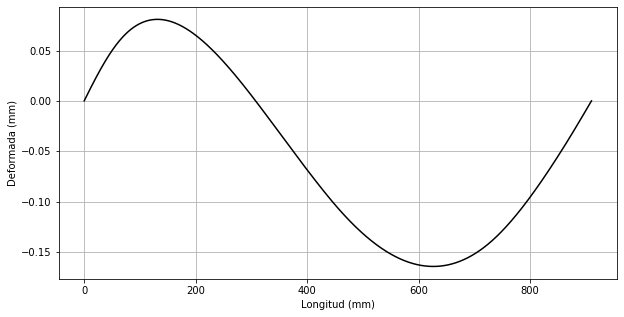

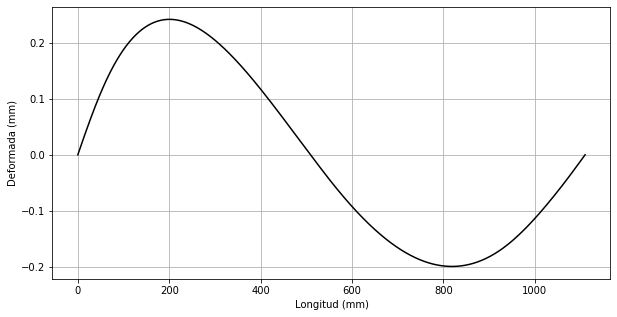

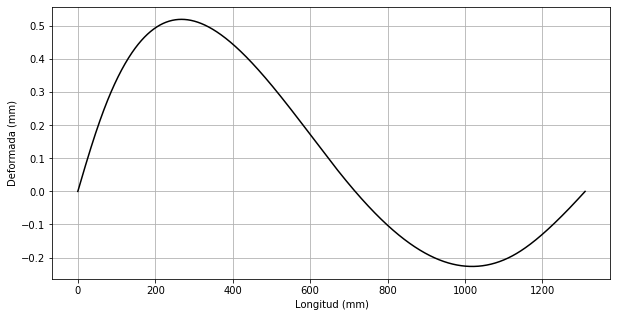

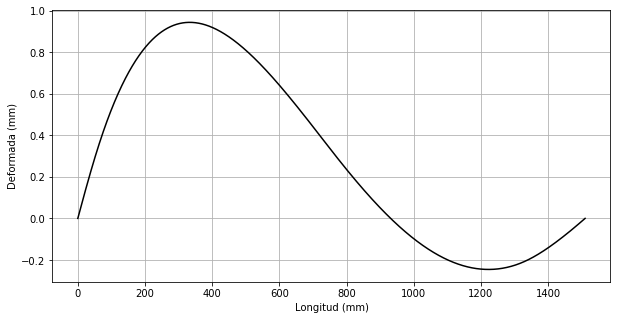

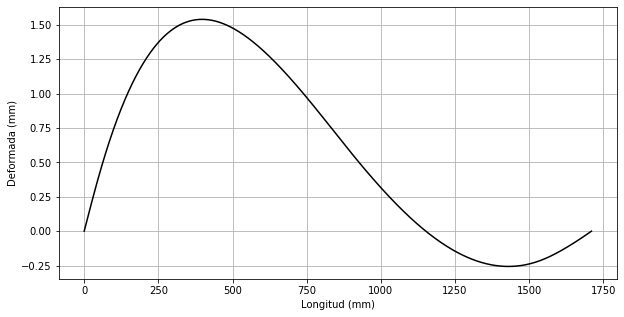

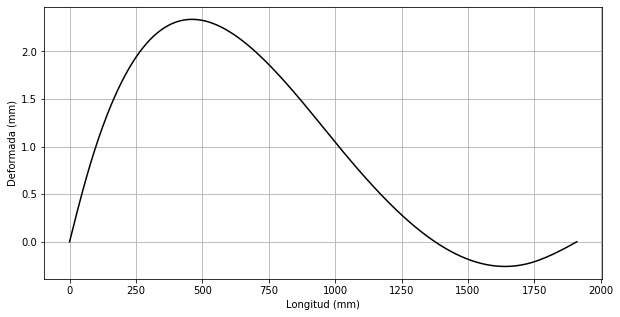

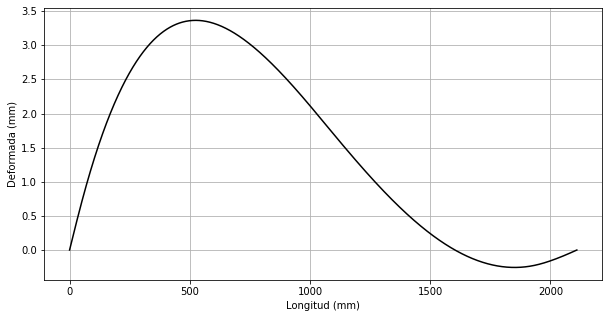

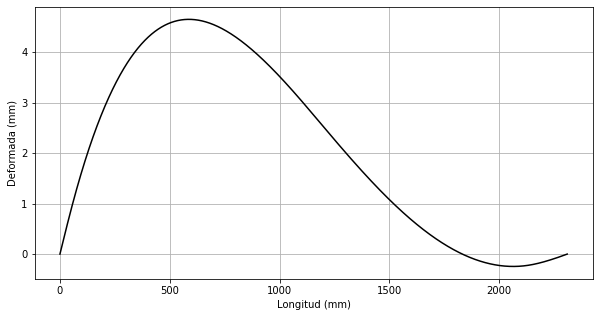

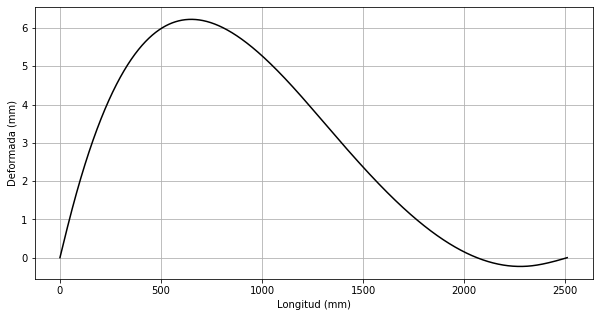

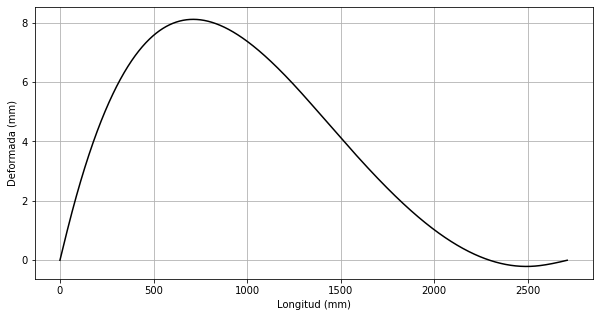

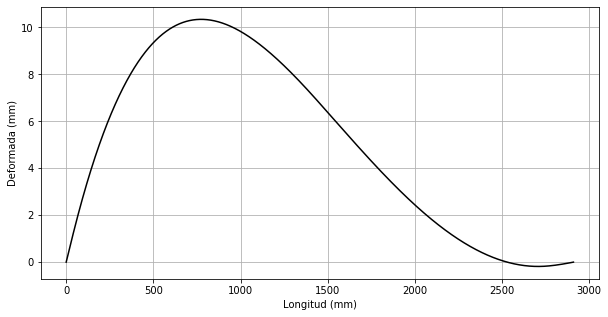

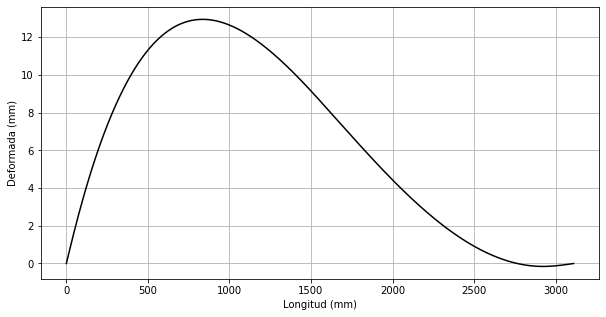

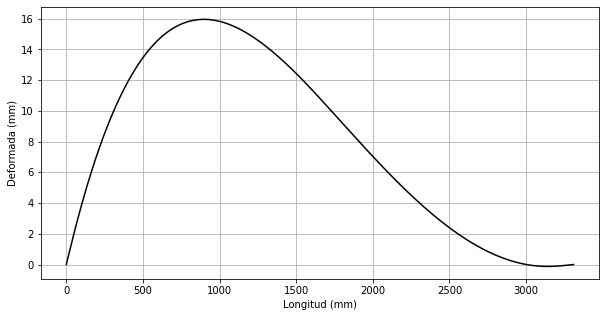

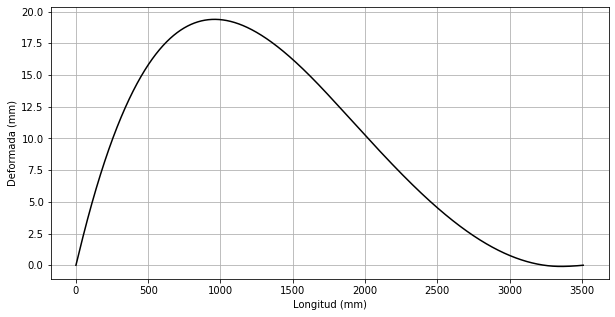

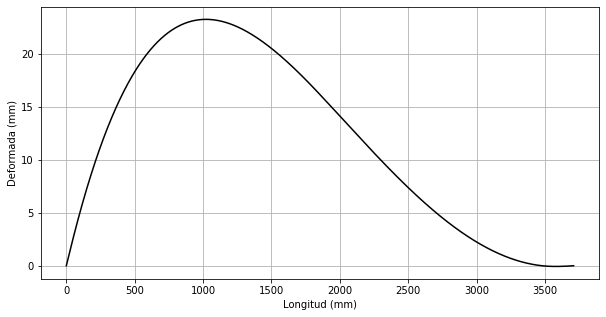

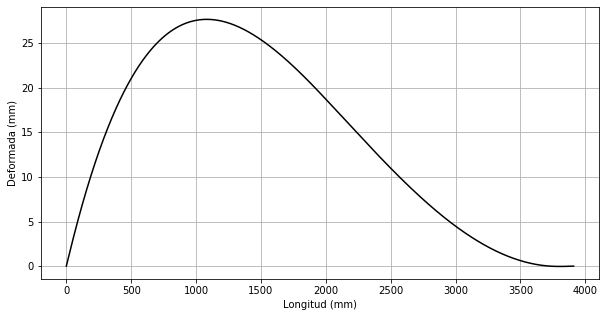

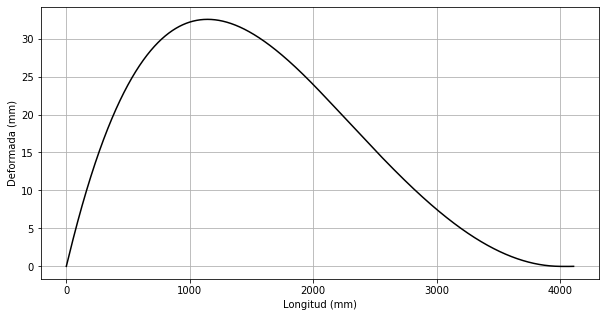

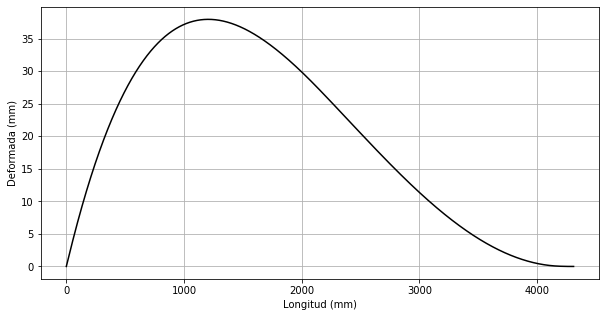

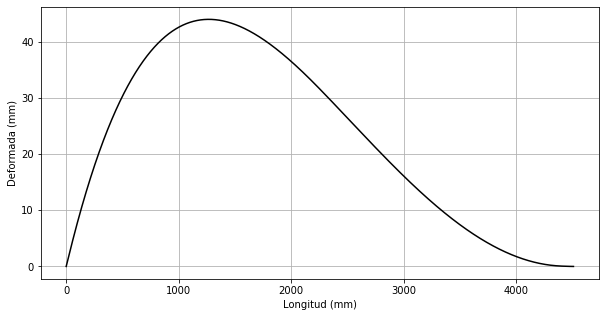

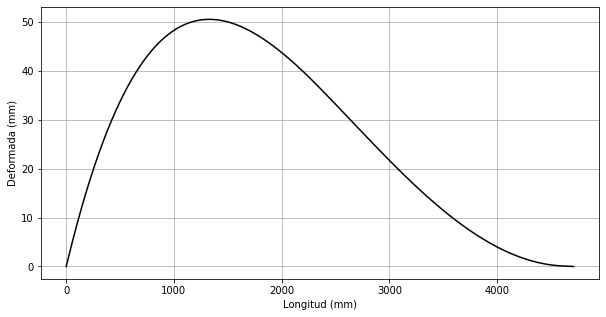

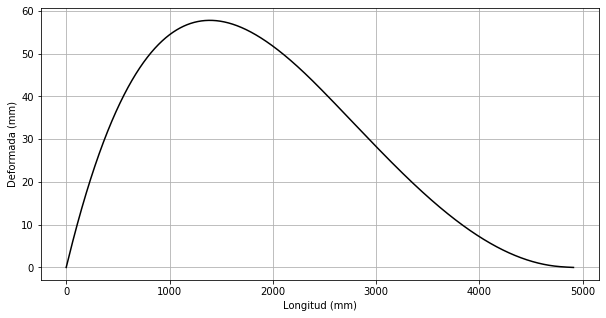

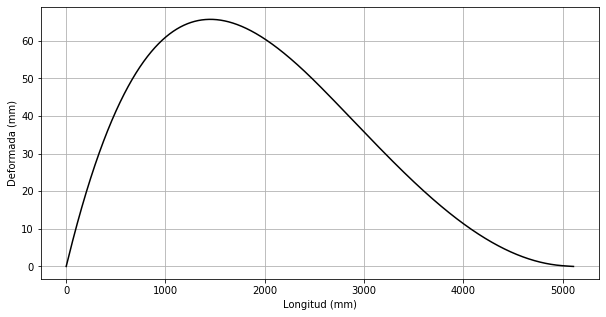

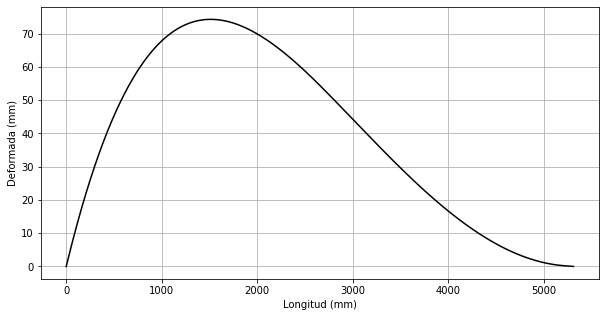

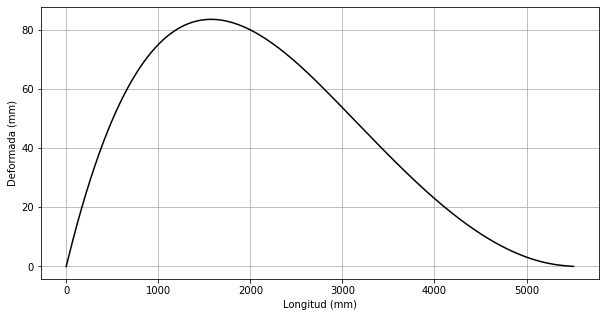

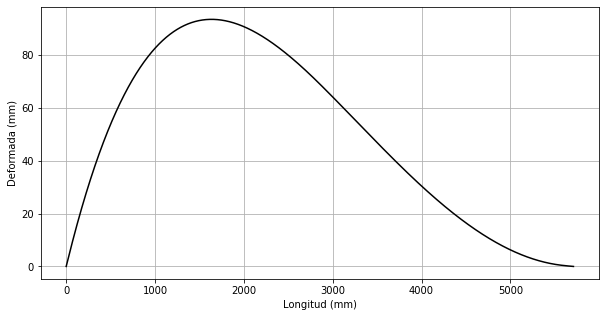

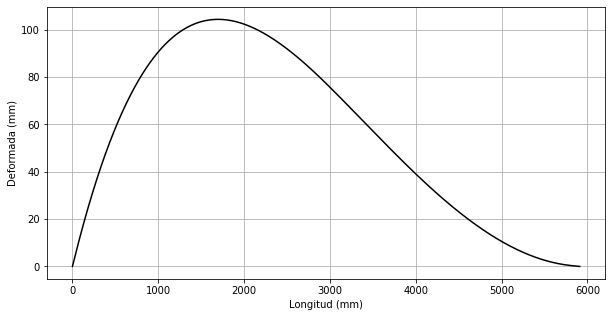

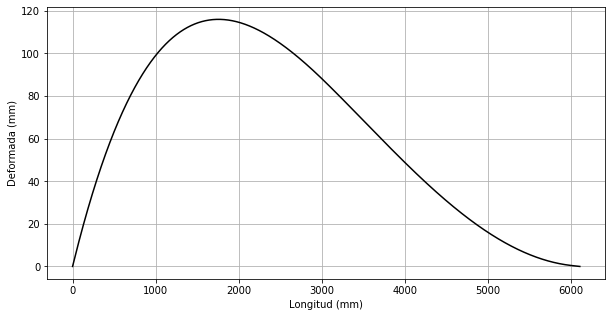

In [46]:
for ka in range(1,30):
    n = 100*ka
    R2 = 5*(2*n*n + 1135*n + 110780)/(n+155)
    R1 = 7340-60*n-R2
    v = []
    v.append(0)
    for x in range(1,310+2*n+1):
        aux = R1
        if x>10:
            aux = aux-(12-n)*(x-10)
        if x>130+2*n:
            aux = aux-(5000+10*n)
        if x>80:
            aux = aux + (12-n)*(x-80)
        if x>260+2*n:
            aux = aux+(50)*(x-(260+2*n)) + (5/12)*(x-(260+2*n))*(x-(260+2*n))
        if x>200+2*n:
            aux = aux-(5/12)*(x - (200+2*n))*(x - (200+2*n))
        if x>=310+2*n:
            aux = aux + R2
        v.append(aux)
    m = []
    for x in range(0,310+2*n+1):
        aux = R1*x
        if x>10:
            aux = aux-(12-n)*(x-10)*(x-10)/2
        if x>130+2*n:
            aux = aux-(5000+10*n)*(x-(130+2*n))
        if x>80:
            aux = aux + (12-n)*(x-80)*(x-80)/2
        if x>260+2*n:
            aux = aux+(25)*(x-(260+2*n))*(x-(260+2*n)) + (5/36)*(x-(260+2*n))*(x-(260+2*n))*(x-(260+2*n))
        if x > 140+n:
            aux = aux+(60000+200*n)
        if x>200+2*n:
            aux = aux-(5/36)*(x - (200+2*n))*(x - (200+2*n))*(x - (200+2*n))
        if x>=310+2*n:
            aux = aux + R2*(x-(310+2*n))
        m.append(aux)
    I = []
    for i in range(0,310+2*n+1):
        if i<10:
            I.append((math.pi*(40)**4)/64)
            continue
        if i<80:
            I.append((math.pi*(50)**4)/64)
            continue
        if i<200+2*n:
            I.append((math.pi*(((50+((i-80)*20/(120+2*n))))**4)/64))
            continue
        if i<260+2*n:
            I.append((math.pi*(70)**4)/64)
            continue
        if i<300+2*n:
            I.append((math.pi*(60)**4)/64)
            continue
        I.append((math.pi*(55)**4)/64)
    mi = []
    mi.append(0)
    for i in range(1,310+2*n+1):
        mi.append(m[i]/I[i] + mi[i-1])
    mii = []
    mii.append(0)
    for i in range(1,310+2*n+1):
        mii.append(mi[i]+mii[i-1])
    const = -mii[310+2*n]/(310+2*n)
    for i in range(0,310+2*n+1):
        mii[i] = (mii[i]+const*i)/E
    plt.figure(figsize=(10,5))
    plt.grid()
    plt.xlabel('Longitud (mm)')
    plt.ylabel('Deformada (mm)')
    plt.plot(mii,'-k')
    sv = 'defj'
    sv = sv+str(n)
    plt.savefig(sv,dpi=300)

In [147]:
maxf = []
posf = []
valn = []
maxesf = []
for ka in range(1,601):
    n = ka
    valn.append(ka)
    R2 = 5*(2*n*n + 1135*n + 110780)/(n+155)
    R1 = 7340-60*n-R2
    v = []
    v.append(0)
    for x in range(1,310+2*n+1):
        aux = R1
        if x>10:
            aux = aux-(12-n)*(x-10)
        if x>130+2*n:
            aux = aux-(5000+10*n)
        if x>80:
            aux = aux + (12-n)*(x-80)
        if x>260+2*n:
            aux = aux+(50)*(x-(260+2*n)) + (5/12)*(x-(260+2*n))*(x-(260+2*n))
        if x>200+2*n:
            aux = aux-(5/12)*(x - (200+2*n))*(x - (200+2*n))
        if x>=310+2*n:
            aux = aux + R2
        v.append(aux)
    m = []
    for x in range(0,310+2*n+1):
        aux = R1*x
        if x>10:
            aux = aux-(12-n)*(x-10)*(x-10)/2
        if x>130+2*n:
            aux = aux-(5000+10*n)*(x-(130+2*n))
        if x>80:
            aux = aux + (12-n)*(x-80)*(x-80)/2
        if x>260+2*n:
            aux = aux+(25)*(x-(260+2*n))*(x-(260+2*n)) + (5/36)*(x-(260+2*n))*(x-(260+2*n))*(x-(260+2*n))
        if x > 140+n:
            aux = aux+(60000+200*n)
        if x>200+2*n:
            aux = aux-(5/36)*(x - (200+2*n))*(x - (200+2*n))*(x - (200+2*n))
        if x>=310+2*n:
            aux = aux + R2*(x-(310+2*n))
        m.append(aux)
    I = []
    for i in range(0,310+2*n+1):
        if i<10:
            I.append((math.pi*(40)**4)/64)
            continue
        if i<80:
            I.append((math.pi*(50)**4)/64)
            continue
        if i<200+2*n:
            I.append((math.pi*(((50+((i-80)*20/(120+2*n))))**4)/64))
            continue
        if i<260+2*n:
            I.append((math.pi*(70)**4)/64)
            continue
        if i<300+2*n:
            I.append((math.pi*(60)**4)/64)
            continue
        I.append((math.pi*(55)**4)/64)
    mi = []
    mi.append(0)
    for i in range(1,310+2*n+1):
        mi.append(m[i]/I[i] + mi[i-1])
    mii = []
    mii.append(0)
    for i in range(1,310+2*n+1):
        mii.append(mi[i]+mii[i-1])
    const = -mii[310+2*n]/(310+2*n)
    for i in range(0,310+2*n+1):
        mii[i] = (mii[i]+const*i)/E
    flechamax = 0
    posflecha = 0
    for i in range(0,310+2*n+1):
        flechamax = max(flechamax,abs(mii[i]))
    for i in range(0,310+2*n+1):
        if(abs(mii[i]) == flechamax):
            posflecha = i
    maxf.append(flechamax)
    posf.append(posflecha)
    esfm = 0
    poses = 0
    area = []
    for uu in range(0,310+2*n+1):
        if uu<10:
            area.append(math.pi*(40/2))
            continue
        if uu<80:
            area.append((math.pi*(50/2)))
            continue
        if uu<200+2*n:
            area.append((math.pi*(((50+((uu-80)*20/(120+2*n)))/2))))
            continue
        if uu<260+2*n:
            area.append((math.pi*(70/2)))
            continue
        if uu<300+2*n:
            area.append(math.pi*(60/2))
            continue
        area.append((math.pi*(55/2)))
    for uu in range(0,310+2*n+1):
        esff = abs(math.sqrt(area[uu]/math.pi)*m[uu]/I[uu])
        if math.sqrt(esff**2 + (v[uu]/area[uu])**2) > esfm:
            esfm = math.sqrt(esff**2 + (v[uu]/area[uu])**2)
    maxesf.append(esfm)

In [148]:
import pandas as pd
table = {'Valor de n': valn,
        'Flecha máxima (mm)': maxf,
         'Posición de flecha máxima (mm)': posf,
        'Máximo esfuerzo (MPa)' : maxesf}
df = pd.DataFrame.from_dict(table)

In [157]:
df[15:]

,Valor de n,Flecha máxima (mm),Posición de flecha máxima (mm),Máximo esfuerzo (MPa)
15,16,0.036858,154,43.814936
16,17,0.037282,156,43.964331
17,18,0.037708,157,44.113337
18,19,0.038135,159,44.261960
19,20,0.038563,160,44.410208
...,...,...,...,...
595,596,0.923507,330,611.138406
596,597,0.928497,331,612.255125
597,598,0.933504,332,613.371838
598,599,0.938527,332,614.488545


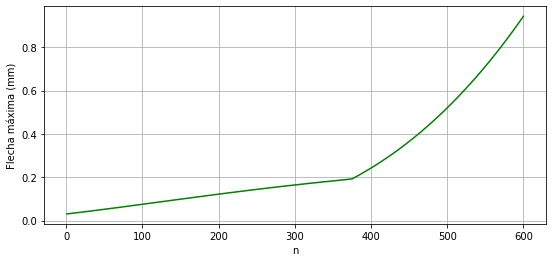

In [153]:
plt.figure(figsize=(9,4))
plt.grid()
plt.xlabel('n')
plt.ylabel('Flecha máxima (mm)')
plt.plot(valn,maxf,'-g')
plt.savefig('maxflen.pdf')

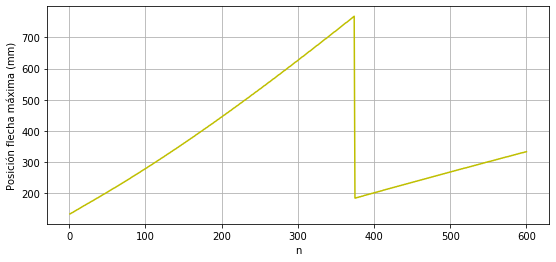

In [154]:
plt.figure(figsize=(9,4))
plt.grid()
plt.xlabel('n')
plt.ylabel('Posición flecha máxima (mm)')
plt.plot(valn,posf,'-y')
plt.savefig('posfn.pdf')

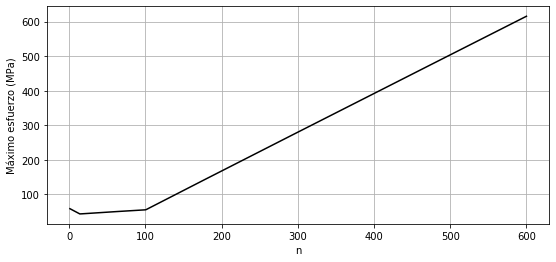

In [155]:
plt.figure(figsize=(9,4))
plt.grid()
plt.xlabel('n')
plt.ylabel('Máximo esfuerzo (MPa)')
plt.plot(valn,maxesf,'-k')
plt.savefig('allesf.pdf')

In [86]:
for ka in range(1,30):
    i = ka*100
    print("\ begin{figure}[H]")
    print('\centering')
    string1 = '\includegraphics[scale=0.4]{defj'
    string1 = string1 + str(i) + '.png}'
    print(string1)
    string2 = '\caption{$n = '
    string2 = string2 + str(i) + '$}'
    print(string2)
    print('\end{figure}')

\ begin{figure}[H]
\centering
\includegraphics[scale=0.4]{defj100.png}
\caption{$n = 100$}
\end{figure}
\ begin{figure}[H]
\centering
\includegraphics[scale=0.4]{defj200.png}
\caption{$n = 200$}
\end{figure}
\ begin{figure}[H]
\centering
\includegraphics[scale=0.4]{defj300.png}
\caption{$n = 300$}
\end{figure}
\ begin{figure}[H]
\centering
\includegraphics[scale=0.4]{defj400.png}
\caption{$n = 400$}
\end{figure}
\ begin{figure}[H]
\centering
\includegraphics[scale=0.4]{defj500.png}
\caption{$n = 500$}
\end{figure}
\ begin{figure}[H]
\centering
\includegraphics[scale=0.4]{defj600.png}
\caption{$n = 600$}
\end{figure}
\ begin{figure}[H]
\centering
\includegraphics[scale=0.4]{defj700.png}
\caption{$n = 700$}
\end{figure}
\ begin{figure}[H]
\centering
\includegraphics[scale=0.4]{defj800.png}
\caption{$n = 800$}
\end{figure}
\ begin{figure}[H]
\centering
\includegraphics[scale=0.4]{defj900.png}
\caption{$n = 900$}
\end{figure}
\ begin{figure}[H]
\centering
\includegraphics[scale=0.4]{defj10